In [11]:
import numpy as np
import xuleta as xu
import pylab as plt
import pandas as pd

In [2]:
laifull = '/home/denis/Downloads/outputsPB/lai_full_medslope.tif'
lainormal = '/home/denis/Downloads/outputsPB/lai_normal_medslope.tif'

In [7]:
# 5 levels
full,m = xu.TifToArray(laifull)
normal,m = xu.TifToArray(lainormal)
full.min(),full.max(),normal.min(),normal.max()

(-0.059372786, 0.057190258, -0.20842364, 0.19960971)

In [14]:
normal = np.where(normal == 0, np.nan, normal)
normal = normal.flatten()
ds = pd.Series(normal)
ds = ds[ds.notnull()]  

In [19]:
full = np.where(full == 0, np.nan, full)
full = full.flatten()
dsf = pd.Series(full)
dsf = dsf[dsf.notnull()] 

In [12]:
normal.min(),normal.mean()-normal.std()*3,normal.mean()+normal.std()*3,normal.max()

(-0.20842364, -0.079999762121587992, 0.091965296771377325, 0.19960971)

In [10]:
full.mean()-full.std()*3,full.mean()+full.std()*3

(-0.03141718078404665, 0.024751248769462109)

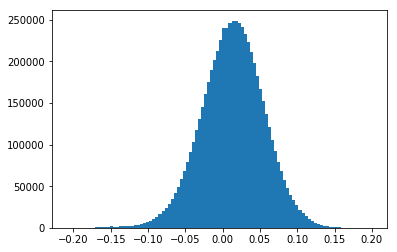

In [18]:
plt.hist(ds,bins=100)
plt.show()

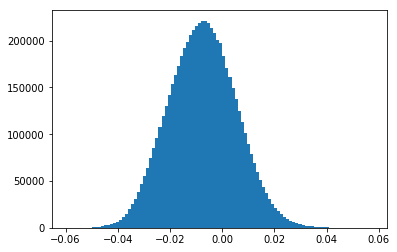

In [20]:
plt.hist(dsf,bins=100)
plt.show()

In [28]:
dsf.mean(),dsf.median(),dsf.std(),dsf.kurtosis()

(-0.007481306791305542,
 -0.007535416632890701,
 0.012831463478505611,
 -0.086476251)

In [30]:
ds.mean(),ds.median(),ds.std(),ds.kurtosis()

(0.013428428210318089, 0.014227421954274178, 0.04156184196472168, 0.37124193)

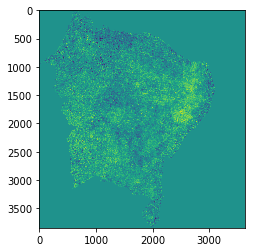

In [30]:
plt.imshow(normal)
plt.show()

In [11]:


n0 = 0.208
n1 = 0.14
n2 = 0.0724
f0 = 0.0594
f1 = 0.0399
f2 = 0.0109

normal[normal > n0] = np.nan
normal[normal < -n0] = np.nan
normal[(normal >= -n0) & (normal < -n1)] = 10
normal[(normal >= -n1) & (normal < -n2)] = 20
normal[(normal >= -n2) & (normal < n2)] = 30
normal[(normal >= n2) & (normal < n1)] = 40
normal[(normal >= n1) & (normal <= n0)] = 50

full[full > f0] = np.nan
full[full < -f0] = np.nan
full[(full >= -f0) & (full < -f1)] = 1
full[(full >= -f1) & (full < -f2)] = 2
full[(full >= -f2) & (full < f2)] = 3
full[(full >= f2) & (full < f1)] = 4
full[(full >= f1) & (full <= f0)] = 5


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater_equal
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater_equal
  del sys.path[0]
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less
  del sys.path[0]
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater_equal
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater_equal
  from ipykernel import kernelapp as app
/usr/local/lib/python3.5/dis

In [4]:
# 3 levels
full,m = xu.TifToArray(laifull)
normal,m = xu.TifToArray(lainormal)

n0 = 0.208
n1 = 0.072
f0 = 0.0594
f1 = 0.0109

normal[normal > n0] = np.nan
normal[normal < -n0] = np.nan
normal[(normal >= -n0) & (normal < -n1)] = 10
normal[(normal >= -n1) & (normal < n1)] = 20
normal[(normal >= n1) & (normal <= n0)] = 30

full[full > f0] = np.nan
full[full < -f0] = np.nan
full[(full >= -f0) & (full < -f1)] = 1
full[(full >= -f1) & (full < f1)] = 2
full[(full >= f1) & (full <= f0)] = 3

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater_equal
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater_equal
  del sys.path[0]
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less
  del sys.path[0]
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater_equal
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less_equal
  


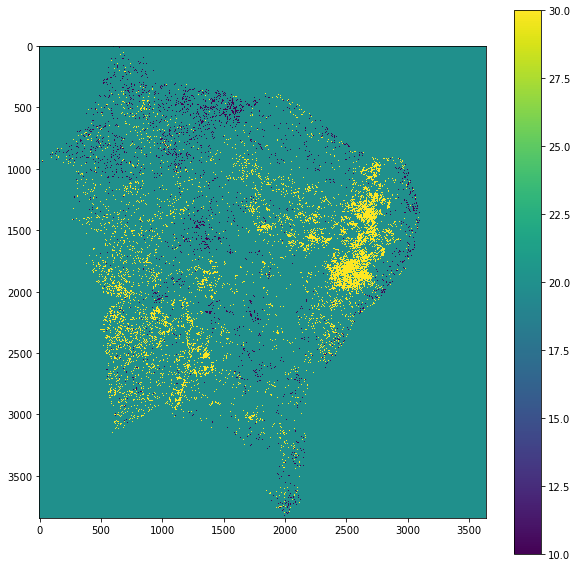

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(normal)
#plt.clim(1,50)
plt.colorbar()
plt.show()

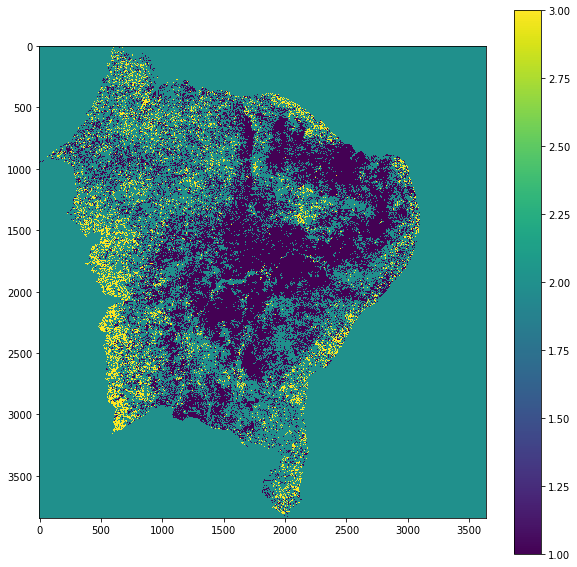

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(full)
plt.colorbar()
plt.show()

In [7]:
totes = full+normal
len(np.unique(totes))

10

In [8]:
totes = totes.astype(int)
totes[totes<0] = 0
len(np.unique(totes))

10

In [9]:
np.unique(totes)

array([ 0, 11, 12, 13, 21, 22, 23, 31, 32, 33])

In [10]:
np.max(totes),np.min(totes)

(33, 0)

In [11]:
import collections
total = collections.Counter(totes.flatten())

In [12]:
len(total)

10

In [13]:
total

Counter({0: 1,
         11: 113511,
         12: 30797,
         13: 398,
         21: 2281641,
         22: 10708066,
         23: 377909,
         31: 92998,
         32: 273892,
         33: 104843})

In [14]:
if len(total) > 12:
    xu.ArrayToTif(totes,'totes5.tif',Folder='/media/denis/seagate/PBv2/outputs/theil-sen/final/',Metadata=m,Type=1)
else:
    xu.ArrayToTif(totes,'totes3.tif',Folder='/media/denis/seagate/PBv2/outputs/theil-sen/final/',Metadata=m,Type=1)


totes3.tif saved.
 
